In [ ]:
# Figure 2, Synthesis manuscript

In [3]:
import pandas as pd
import glob as glob
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [4]:
tcga_colors = pd.read_csv(
    'tcga_colors.tsv',
    sep = '\t', index_col = 0)

In [5]:
tcga_colors

,cohort_color
tcga_cohorts,
ACC,#C1A72F
BLCA,#FAD2D9
BRCA,#ED2891
CESC,#F6B667
COADREAD,#9EDDF9
ESCC,#007EB5
GEA,#909485
HNSC,#97D1A9
KIRCKICH,#F8AFB3


In [8]:
delta_accuracy = pd.read_csv(
    'delta_accuracy.tsv',
    sep = '\t', index_col = 0)

In [9]:
delta_accuracy

,Difference in accuracy from original,phase,Cohort,Method
0,0.005556,Mixed,ACC,RNLVS sigma=1
1,-0.027778,Mixed,ACC,RNLVS sigma=1
2,0.033333,Mixed,ACC,RNLVS sigma=1
3,0.027778,Mixed,ACC,RNLVS sigma=1
4,0.038889,Mixed,ACC,RNLVS sigma=1
...,...,...,...,...
20,0.011765,Mixed,UVM,HLVS n=2
21,0.017647,Mixed,UVM,HLVS n=2
22,0.032353,Mixed,UVM,HLVS n=2
23,-0.011765,Mixed,UVM,HLVS n=2


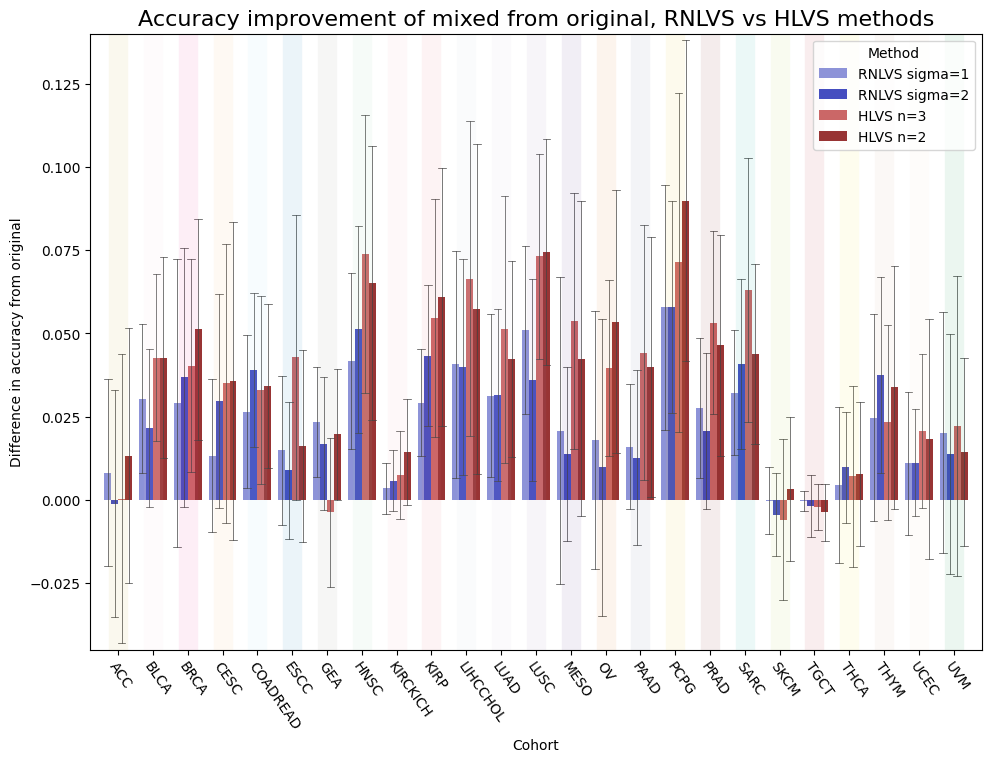

In [10]:
c_lst = delta_accuracy.Cohort.unique()
figure(figsize=(11.5, 8))
pal = {'RNLVS sigma=1': '#8088e5',
          'RNLVS sigma=2': '#303dd5',
          'HLVS n=3': '#dc5656',
          'HLVS n=2': '#a92323'}
ax = sns.barplot(x='Cohort', y='Difference in accuracy from original',
            hue='Method',
                 palette=pal,
            data=delta_accuracy, linewidth = .5, errorbar = 'sd', errwidth = .5, capsize = .22)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-55,
                   ha='left', rotation_mode='anchor')
ax.set_title('Accuracy improvement of mixed from original, RNLVS vs HLVS methods',
            fontsize = 16)

for x in list(range(0,25)):
    c = c_lst[x]

    plt.vlines(x = x, ymin = -.045, ymax = .14,
           colors = tcga_colors.loc[c,'cohort_color'],
               alpha = .08, linewidth = 14)

ax.set_xlim(-0.8, len(exp_frm_read_tst['Cohort'].unique()) - 0.2)
ax.set_ylim(top=.14,bottom = -.045) 
ax.get_figure().savefig(
    'Figure_2.pdf', dpi = 300, bbox_inches = 'tight',
                       transparent = True)